In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import os
from IPython.display import display, clear_output
import imageio


In [3]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

x_train, x_test = x_train / 255.0, x_test / 255.0
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

In [6]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),  # Flatten 28x28 images into 1D vectors
    tf.keras.layers.Dense(10, activation='softmax') # Output layer with 10 classes (digits 0-9)
])

model.compile(optimizer=tf.keras.optimizers.Adam(0.005),
              loss='categorical_crossentropy',
              metrics=['accuracy'])


os.makedirs('frames', exist_ok=True)

class customCallback(tf.keras.callbacks.Callback):
    def __init__(self):
        super().__init__()
        self.frame_count = 0

    def on_batch_end(self, batch, logs=None):
        clear_output(wait=True)
        fig, axes = plt.subplots(2, 5, figsize=(10, 4))
        axes = axes.flatten()
        for index, node in enumerate(self.model.layers[1].get_weights()[0].T[:10]):
            node = node.reshape(28, 28)
            ax = axes[index]
            ax.imshow(node, cmap='viridis')
            ax.axis('off')
        fig.suptitle(f'frame_{self.frame_count:04d}', fontsize=10)        
        display(fig)
        plt.savefig(f'frames/frame_{self.frame_count:04d}.png')
        plt.close(fig)
        self.frame_count += 1



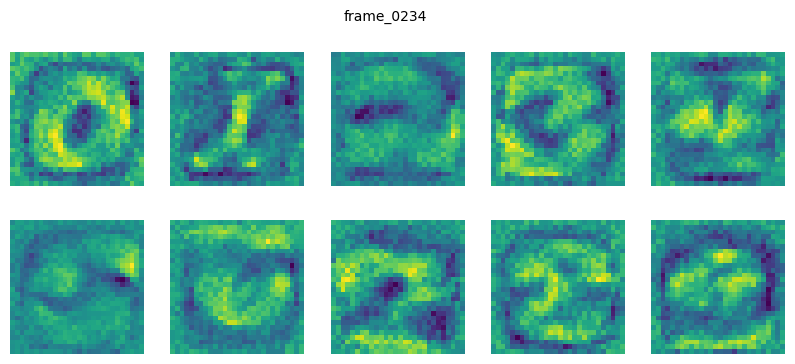

235/235 [==============================] - 44s 184ms/step - loss: 0.4589 - accuracy: 0.8747 - val_loss: 0.3038 - val_accuracy: 0.9160


In [7]:
history = model.fit(x_train, y_train, epochs=1, batch_size=256, validation_data=(x_test, y_test), callbacks=[customCallback()])


In [14]:
image_folder = 'frames'  
gif_filename = 'output.gif'  

images = [img for img in os.listdir(image_folder) if img.endswith(".png") or img.endswith(".jpg")]
images.sort()  # Sorts the images by name

with imageio.get_writer(gif_filename, mode='I', duration=0.5) as writer:
    for filename in images:
        image_path = os.path.join(image_folder, filename)
        image = imageio.imread(image_path)
        writer.append_data(image)

print(f"GIF created and saved as {gif_filename}")

C:\Users\anant\AppData\Local\Temp\ipykernel_18732\1616476400.py:10: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(image_path)


GIF created and saved as output.gif


In [8]:
import os
from PIL import Image

# Path to the directory containing the frames
frame_dir = r"C:\Users\anant\Desktop\website repo\project_repo\Deep Learning Portfolio\exploring-neural-network\frames"  # Replace with your actual directory path

# Load all image files in the directory, sorted by name
frames = [Image.open(os.path.join(frame_dir, file)) for file in sorted(os.listdir(frame_dir)) if file.endswith(('.png', '.jpg'))]

# Determine the number of frames
total_frames = len(frames)

# Define durations for each frame
durations = [200 if i < 50 else 25 for i in range(300)]  # 0.25s for first 100 frames, 0.1s for the rest

# Save frames as GIF with custom durations
frames[0].save(
    'output.gif',
    save_all=True,
    append_images=frames[1:],
    duration=durations,
    loop=0
)
